In [1]:
%%js # Exécuter cette cellule pour colorer les énoncés s'ils ne le sont pas déjà
function colorCells() { for (let cell of Jupyter.notebook.get_cells()) if (cell.metadata.tags && cell.metadata.tags.indexOf('nsi_enonce') >= 0) cell.element.css('background', '#DDDDFF'); } if (Jupyter.notebook.kernel) colorCells(); else Jupyter.notebook.events.one('kernel_ready.Kernel', (e) => colorCells())

<IPython.core.display.Javascript object>

Activité d’introduction : Contrôler la tortue
=============================================

Objectifs
---------

Dans l’activité du chapitre 2, nous avons créé une fonction `polygone` qui trace un polygone à l’aide de la bibliothèque `turtle`. Nous allons maintenant créer une **interface** permettant à l’utilisateur d’utiliser cette fonction en cliquant sur un bouton.

### Des boutons pour lancer des fonctions

Pour commencer, nous créons un bouton pour dessiner un polygone. Nous utilisons la fonction `button` de la bibliothèque `nsi_ui` créée spécialement pour ce manuel. Elle prend pour paramètres le titre du bouton et la fonction Python à appeler lorsque l’on clique dessus.



```python
from turtle import *
from nsi_ui import *
# insérer ici la fonction polygone du chapitre 2
def creer_polygone():
    """ Fonction sans paramètres que l'on va associer au bouton """
    polygone(5, 60)
button("Polygone", creer_polygone)  # bouton pour faire le dessin
```

> **Note**
>
> A la ligne 7 on *n’appelle pas* la fonction `creer_polygone`, ce qui s’écrirait `creer_polygone()` (avec des parenthèses). Ici on y fait *référence*, en donnant juste son nom.


**Question :** Créer un second bouton sur le modèle de la ligne 7 pour effacer l’écran (fonction `clear` de la bibliothèque `turtle`).


In [ ]:
# Exécuter d'abord cette cellule dans Jupyter 

from nsi_turtle import *
from nsi_ui import *

# Utile seulement dans Jupyter
clear_ui()

def creer_polygone():
    """ Fonction sans paramètres que l'on va associer au bouton """
    polygone(5, 60)

button("Polygone", creer_polygone)  # bouton pour faire le dessin

In [ ]:
def polygone(n, cote):
    """ Trace un polygone de n cotes de taille `cote` """
    for i in range(n):
        forward(cote)
        right(360/n)

button("Effacer", clear)

main_loop()

### Des tirettes pour contrôler les paramètres

Pour contrôler la taille du pentagone, on crée une tirette à l’aide de la fonction `slider(…​)` de la bibliothèque `nsi_ui`. La fonction `get_int` retourne la valeur de la tirette. On modifie la fonction `creer_polygone` pour utiliser la valeur de la tirette : 

```python
# paramètres de slider() : titre du bouton, valeurs min et max
tirette_taille = slider("Taille", 10, 100)
def creer_polygone():
    polygone(5, get_int(tirette_taille))
```

**Question :** Créer une seconde tirette pour régler le nombre de côtés du polygone, et modifier la fonction `creer_polygone` en conséquence.

L’interface finale a l’aspect suivant : 
<div>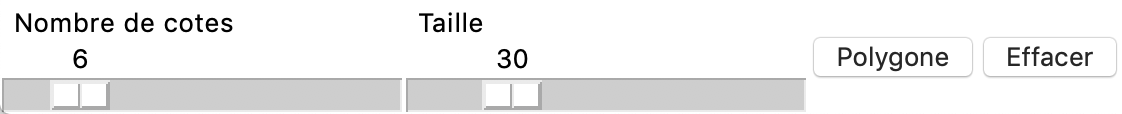</div>

In [ ]:
# Exécuter d'abord cette cellule dans Jupyter

from nsi_turtle import *
from nsi_ui import *

# Utile seulement dans Jupyter
clear_ui()

def polygone(n, cote):
    """ Trace un polygone de n cotes de taille `cote` """
    for i in range(n):
        forward(cote)
        right(360/n)


In [ ]:
tirette_taille = slider("Taille", 10, 100)
tirette_ncotes = slider("Nombre de cotes", 3, 50)

def creer_polygone():
    polygone(get_int(tirette_ncotes), get_int(tirette_taille))

button("Polygone", creer_polygone)  # bouton pour faire le dessin
button("Effacer", clear)

main_loop()

### Piloter la tortue au clavier

Le code suivant fait avancer la tortue en appuyant sur la flèche vers le haut (`"Up"`). La fonction `onkey` spécifie ce que le programme doit faire lorsqu’il détecte l’appui d’une touche du clavier. 

```python
def avance():
    forward(10)
onkey(avance, "Up") # paramètres : fonction à appeler, nom de la touche
```

**Question :** compléter le programme ci-dessus pour faire tourner la tortue à angles droits avec les flèches droite (`"Right"`) et gauche (`"Left"`).


In [ ]:
# Exécuter d'abord cette cellule dans Jupyter

from nsi_turtle import *
from nsi_ui import *

# Utile seulement dans Jupyter
clear_ui()

# On redéfinit la fonction qui associe une fonction de rappel
# à l'appui sur une touche par l'affichage d'un bouton
def onkey(f, cle):
    button(cle, f)

def avance():
    forward(10)

onkey(avance, "Up") # paramètres : fonction à appeler, nom de la touche

In [ ]:
def gauche():
    left(10)

def droite():
    right(10)

onkey(droite, "Right")
onkey(gauche, "Left")

main_loop()